### Data Dictionary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)

import warnings
warnings.filterwarnings('ignore')

from pycaret.classification import *

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("ChurnData.csv")

In [3]:
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11,33,7,136,5,5,0,1,1,4.40,20.75,0.00,15.25,35.7,42.00,211.45,125.0,1,1,0,1,1,0,1.482,3.033,4.913,4,1
1,33,33,12,33,2,0,0,0,0,9.45,0.00,0.00,0.00,0.0,288.80,0.00,0.0,0,0,0,0,0,0,2.246,3.240,3.497,1,1
2,23,30,9,30,1,2,0,0,0,6.30,0.00,0.00,0.00,0.0,157.05,0.00,0.0,0,0,0,0,1,0,1.841,3.240,3.401,3,0
3,38,35,5,76,2,10,1,1,1,6.05,45.00,50.10,23.25,64.9,239.55,1873.05,880.0,1,1,1,1,1,1,1.800,3.807,4.331,4,0
4,7,35,14,80,2,15,0,1,0,7.10,22.00,0.00,23.75,0.0,47.45,166.10,145.0,1,0,0,1,1,0,1.960,3.091,4.382,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55,44,24,83,1,23,0,1,0,17.35,24.50,0.00,14.25,0.0,973.10,1343.50,720.0,0,0,0,0,1,0,2.854,3.199,4.419,3,0
196,34,23,3,24,1,7,0,1,0,6.00,28.00,0.00,12.75,0.0,203.25,959.40,435.0,0,0,0,1,1,0,1.792,3.332,3.178,3,0
197,6,32,10,47,1,10,0,1,0,3.85,23.75,0.00,12.50,0.0,29.90,128.45,80.0,0,0,0,1,1,0,1.348,3.168,3.850,3,0
198,24,30,0,25,4,5,0,1,1,8.70,47.75,0.00,32.75,64.0,186.60,1152.90,780.0,1,1,1,1,1,1,2.163,3.866,3.219,4,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    int64  
 1   age       200 non-null    int64  
 2   address   200 non-null    int64  
 3   income    200 non-null    int64  
 4   ed        200 non-null    int64  
 5   employ    200 non-null    int64  
 6   equip     200 non-null    int64  
 7   callcard  200 non-null    int64  
 8   wireless  200 non-null    int64  
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    int64  
 18  pager     200 non-null    int64  
 19  internet  200 non-null    int64  
 20  callwait  200 non-null    int64 

In [5]:
df.describe(include='all')

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,13.240000,15.783250,14.358750,12.2170,577.770750,507.007500,650.663750,0.295000,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,15.643842,19.557103,14.781269,21.6326,746.608653,820.027858,941.470689,0.457187,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,0.000000,0.000000,0.000000,0.0000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,0.000000,0.000000,0.000000,0.0000,79.337500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,0.000000,0.000000,12.500000,0.0000,289.525000,0.000000,342.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,24.750000,33.012500,20.750000,23.4625,806.762500,724.162500,921.250000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,68.500000,63.250000,109.250000,109.7000,4333.000000,4938.600000,7515.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [6]:
df.shape

(200, 28)

In [7]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

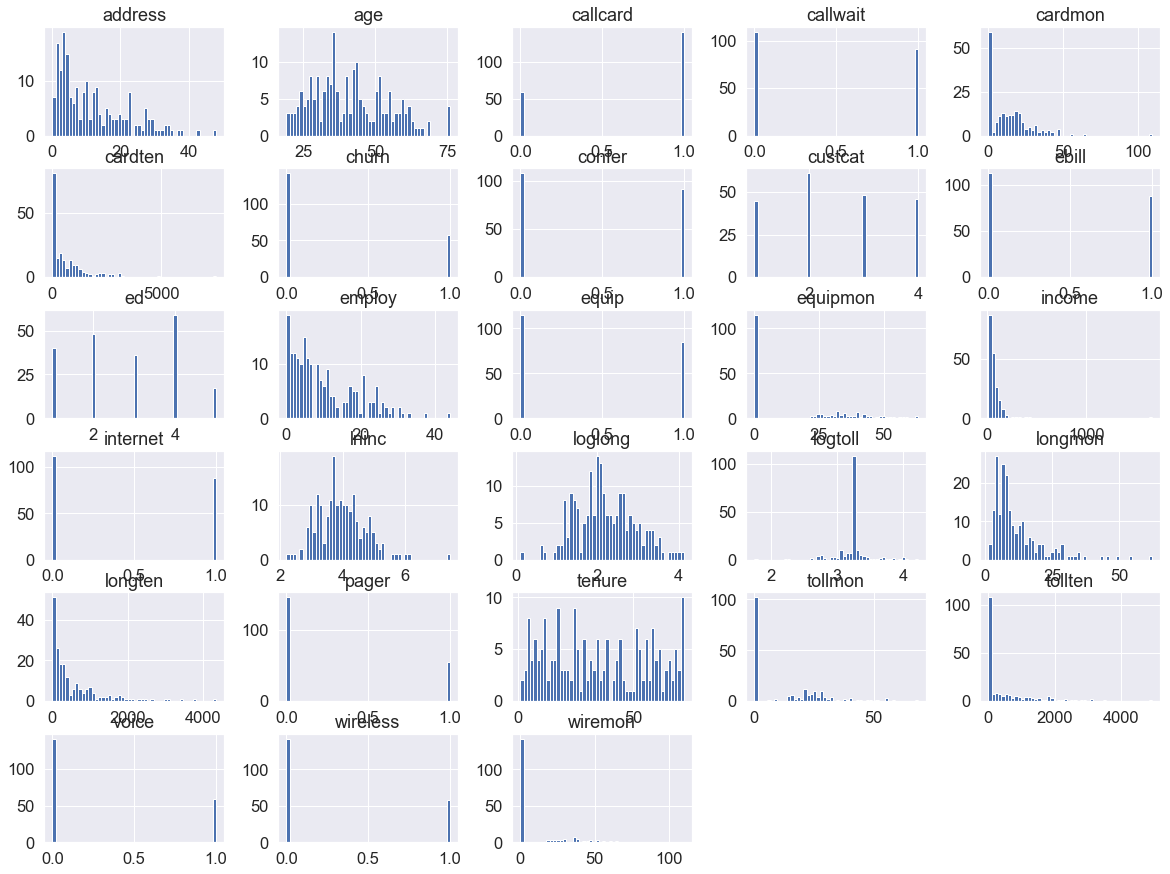

In [8]:
df.hist(bins=50, figsize=(20,15))

plt.show()

### Using Pycaret

In [9]:
exp_cat = setup(data = df, target = 'churn', session_id=123, transformation=True) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(200, 28)"
4,Missing Values,False
5,Numeric Features,16
6,Categorical Features,11
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.768700,0.830800,0.525000,0.600000,0.536300,0.394700
1,Naive Bayes,0.762100,0.840000,0.775000,0.570000,0.651100,0.478700
2,K Neighbors Classifier,0.754400,0.759600,0.450000,0.583300,0.486700,0.346300
3,Quadratic Discriminant Analysis,0.741800,0.720300,0.200000,0.500000,0.280000,0.193200
4,Ridge Classifier,0.740100,0.000000,0.475000,0.530000,0.465200,0.310700
5,Random Forest Classifier,0.740100,0.741900,0.275000,0.600000,0.358100,0.234900
6,Linear Discriminant Analysis,0.733000,0.801400,0.475000,0.490000,0.471400,0.302500
7,Light Gradient Boosting Machine,0.733000,0.776500,0.450000,0.530000,0.460300,0.297100
8,SVM - Linear Kernel,0.726900,0.000000,0.625000,0.478800,0.536600,0.352500
9,CatBoost Classifier,0.703300,0.743600,0.375000,0.490000,0.399200,0.218600


In [11]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.8500,0.5000,1.0000,0.6667,0.5882
1,0.8571,0.8750,0.7500,0.7500,0.7500,0.6500
2,0.7857,0.9000,0.7500,0.6000,0.6667,0.5116
3,0.8571,0.9250,0.7500,0.7500,0.7500,0.6500
4,0.8571,0.9750,1.0000,0.6667,0.8000,0.6957
5,0.8571,0.9250,0.5000,1.0000,0.6667,0.5882
6,0.6429,0.6750,0.0000,0.0000,0.0000,-0.1290
7,0.7143,0.8000,0.2500,0.5000,0.3333,0.1765
8,0.6429,0.8000,0.5000,0.4000,0.4444,0.1860
9,0.6154,0.5833,0.2500,0.3333,0.2857,0.0299


In [12]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [13]:
tuned_lr = tune_model('lr', optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8571,0.8250,0.5000,1.0000,0.6667,0.5882
1,0.8571,0.9000,0.7500,0.7500,0.7500,0.6500
2,0.7857,0.9000,0.7500,0.6000,0.6667,0.5116
3,0.9286,0.9250,1.0000,0.8000,0.8889,0.8372
4,0.8571,0.9750,1.0000,0.6667,0.8000,0.6957
5,0.8571,0.9250,0.5000,1.0000,0.6667,0.5882
6,0.6429,0.6500,0.0000,0.0000,0.0000,-0.1290
7,0.7143,0.7500,0.2500,0.5000,0.3333,0.1765
8,0.6429,0.8000,0.5000,0.4000,0.4444,0.1860
9,0.6154,0.6111,0.2500,0.3333,0.2857,0.0299


In [14]:
print(tuned_lr)

LogisticRegression(C=1.94, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


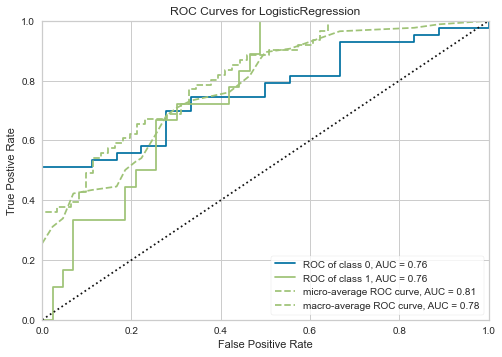

In [15]:
plot_model(tuned_lr)

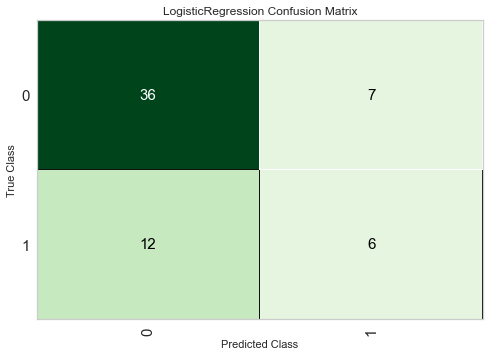

In [16]:
plot_model(tuned_lr, plot='confusion_matrix')

In [17]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.6885,0.7636,0.3333,0.4615,0.3871,0.1855


,tenure,age,address,employ,longmon,tollmon,cardmon,wiremon,longten,tollten,...,callwait_0,confer_0,ebill_0,custcat_1,custcat_2,custcat_3,custcat_4,churn,Label,Score
0,-0.297785,0.269465,1.125159,-0.543360,-0.141552,-0.970505,-1.365648,-0.638926,-0.022237,-0.960409,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,0.4134
1,0.760677,0.484087,-0.052889,1.165258,0.928592,1.027238,0.805790,1.567328,0.818166,1.191423,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0028
2,-0.015243,0.342358,0.169572,1.347930,-0.187700,1.069151,0.596050,-0.638926,-0.101768,1.087434,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0043
3,0.530970,1.673881,1.978484,0.568509,-0.169045,-0.970505,0.286114,-0.638926,0.140787,-0.960409,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,0.0021
4,1.488208,2.111932,1.762444,2.275669,2.153906,1.131679,0.930423,-0.638926,2.038174,1.299870,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.0403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,-0.397725,-1.370292,-0.865648,-1.758347,0.273069,-0.970505,0.900230,1.508020,-0.023000,-0.960409,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1,0.5856
57,0.685411,0.817087,1.332397,1.033178,0.536378,1.027238,0.363316,-0.638926,0.539242,1.170988,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0.1627
58,1.050260,-1.256813,-0.865648,-1.300064,0.515186,-0.970505,1.596836,1.538271,0.783588,-0.960409,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1,0,0.0705
59,0.117854,-0.459322,-0.179335,0.279180,0.641754,-0.970505,-0.444934,-0.638926,0.500492,-0.960409,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,0.1365
